In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [10]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [11]:
data = torch.tensor(housing.data, dtype=torch.float32)
target = torch.tensor(housing.target, dtype=torch.float32)

In [12]:
# divide data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)

In [13]:
# create scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [15]:
# create dataloaders
trainloader = torch.utils.data.DataLoader(list(zip(x_train, y_train)), batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(list(zip(x_test, y_test)), batch_size=64, shuffle=True)

In [16]:
#create model with nn.Sequential
model = nn.Sequential()
model.add_module('linear_1', nn.Linear(8, 16))
model.add_module('relu_1', nn.ReLU())
model.add_module('linear_2', nn.Linear(16, 1))


In [21]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epoch_size = 64

In [26]:
def train_regression(model, num_epochs, train_dl, valid_dl, loss_fn, optimizer):
    loss_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch.float())[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)

        loss_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch.float())[:, 0]
                loss = loss_fn(pred, y_batch.float())
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        
        print(f'Epoch {epoch+1} MSE: {loss_hist_train[epoch]:.4f} val_MSE: {loss_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid

In [20]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, valid_loss, num_epochs):
    epochs = range(1, num_epochs + 1)
    
    plt.plot(epochs, train_loss, label='Training Loss', marker='o')
    plt.plot(epochs, valid_loss, label='Validation Loss', marker='o')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.grid()
    
    plt.show()

In [27]:
train_loss, valid_loss = train_regression(model, epoch_size, trainloader, testloader, loss_fn, optimizer)

Epoch 1 MSE: 2.1961 val_MSE: 0.8470
Epoch 2 MSE: 0.7254 val_MSE: 0.6388
Epoch 3 MSE: 0.5602 val_MSE: 0.5324
Epoch 4 MSE: 0.4820 val_MSE: 0.4785
Epoch 5 MSE: 0.4462 val_MSE: 0.4534
Epoch 6 MSE: 0.4283 val_MSE: 0.4494
Epoch 7 MSE: 0.4179 val_MSE: 0.4391
Epoch 8 MSE: 0.4123 val_MSE: 0.4328
Epoch 9 MSE: 0.4060 val_MSE: 0.4278
Epoch 10 MSE: 0.4024 val_MSE: 0.4284
Epoch 11 MSE: 0.3994 val_MSE: 0.4231
Epoch 12 MSE: 0.3964 val_MSE: 0.4182
Epoch 13 MSE: 0.3949 val_MSE: 0.4155
Epoch 14 MSE: 0.3933 val_MSE: 0.4180
Epoch 15 MSE: 0.3885 val_MSE: 0.4134
Epoch 16 MSE: 0.3869 val_MSE: 0.4096
Epoch 17 MSE: 0.3853 val_MSE: 0.4080
Epoch 18 MSE: 0.3838 val_MSE: 0.4095
Epoch 19 MSE: 0.3821 val_MSE: 0.4075
Epoch 20 MSE: 0.3805 val_MSE: 0.4029
Epoch 21 MSE: 0.3789 val_MSE: 0.4020
Epoch 22 MSE: 0.3769 val_MSE: 0.4034
Epoch 23 MSE: 0.3762 val_MSE: 0.3982
Epoch 24 MSE: 0.3739 val_MSE: 0.3968
Epoch 25 MSE: 0.3727 val_MSE: 0.3960
Epoch 26 MSE: 0.3713 val_MSE: 0.3993
Epoch 27 MSE: 0.3707 val_MSE: 0.3917
Epoch 28 M

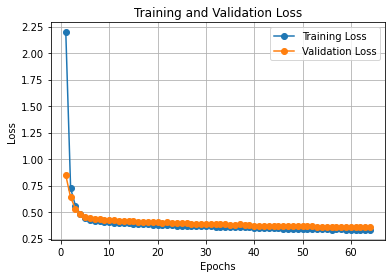

In [29]:
plot_loss(train_loss, valid_loss, epoch_size)